# SVM by sklearn

SVM - support vector machine - support vrctors, objects of sample - points, which is support for searching maximum width of the hyperplane band

sv - vector from the train sample

$kernel = "linear"$ is a linear kernel = the scalar product between two vectors (w, x) = np.dot(w, x)

In [24]:
from sklearn import svm
import numpy as np 
import matplotlib.pyplot as plt

x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = np.array([x + [1] for x in x_train]) # a feature for a shift
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# clf - classifier
clf = svm.SVC(kernel='linear') # SVM with linear kernel, svm class for SVM = SVC
clf.fit(x_train, y_train) # fit (w-search)

lin_clf = svm.LinearSVC() # here is class LinearSVC, svm for linear-divided sample
lin_clf.fit(x_train, y_train) # fit (w-search)

v = clf.support_vectors_ # selecting support vectors (support points for creating hyperplane)
w = lin_clf.coef_[0] # coefficients linear model

print(w, v, sep = '\n')

[ 0.24371928 -0.13071312  0.01218596]
[[20. 45.  1.]
 [20. 30.  1.]
 [30. 45.  1.]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# Plotting

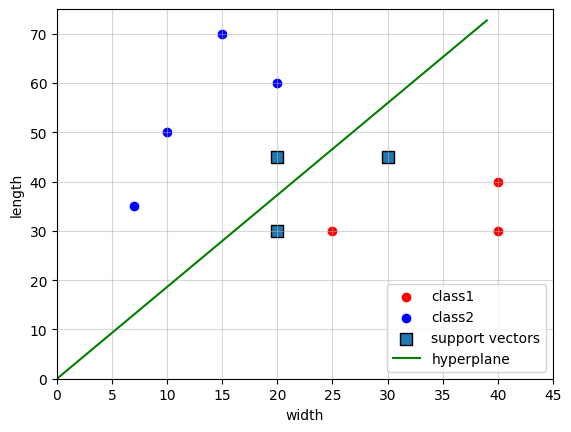

In [25]:
# x and y = x1 and x2 - features
line_x = list(range(max(x_train[:, 0])))
line_y = [-x * w[0] / w[1] - w[2] for x in line_x] # w[2] / w[1] or not??

''' 
beacuse x +[1] gives me w[2], which is bias - shifting instead of b in y = ax + b
'''
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='r', label='class1')
plt.scatter(x_1[:, 0], x_1[:, 1], c='b', label='class2')

plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor='black', linewidth=1, marker='s', label='support vectors')
# the hyperplane
plt.plot(line_x, line_y, color='green', label='hyperplane')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel('length')
plt.xlabel('width')
plt.legend()
plt.grid(True, alpha=0.5)

# Making with a linearly undivided sample

In [26]:
# add [30, 10], [15, 50] and [-1, 1] - wrong classification
x_train = [[30, 10], [15, 50], [10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = np.array([x + [1] for x in x_train]) # a feature for a shift
y_train = np.array([-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# clf - classifier
clf = svm.SVC(kernel='linear') # SVM with linear kernel, svm class for SVM = SVC
clf.fit(x_train, y_train) # fit (w-search)
y_pr = clf.predict(x_train) # predictions
print(np.array(y_pr) - np.array(y_train)) # 0 - correct classification, else - incorrect

# # linear svc we can't use, because it's only for linearly divided smaple
# lin_clf = svm.LinearSVC() # here is class LinearSVC, svm for linear-divided sample
# lin_clf.fit(x_train, y_train) # fit (w-search)

v = clf.support_vectors_ # selecting support vectors (support points for creating hyperplane)
print(v)

[ 2 -2  0  0  0  0  0  0  0  0  0  0]
[[30. 10.  1.]
 [20. 60.  1.]
 [20. 45.  1.]
 [ 7. 35.  1.]
 [15. 50.  1.]
 [20. 30.  1.]
 [25. 30.  1.]
 [30. 45.  1.]]


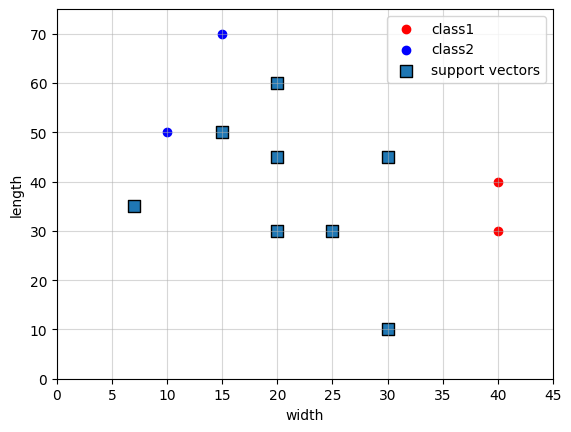

In [27]:
# x and y = x1 and x2 - features
''' 
beacuse x +[1] gives me w[2], which is bias - shifting instead of b in y = ax + b
'''
x_0 = x_train[y_train == 1]
x_1 = x_train[y_train == -1]

plt.scatter(x_0[:, 0], x_0[:, 1], color='r', label='class1')
plt.scatter(x_1[:, 0], x_1[:, 1], c='b', label='class2')

plt.scatter(v[:, 0], v[:, 1], s=70, edgecolor='black', linewidth=1, marker='s', label='support vectors')
# the hyperplane

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel('length')
plt.xlabel('width')
plt.legend()
plt.grid(True, alpha=0.5)

# Task 1

In [29]:
import numpy as np
from sklearn import svm

data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

# обучающая выборка в формате [1, x1, x2]
x_train = np.array([[1] + list(x) for x in data_x]) # входные образы
y_train = np.array(data_y) # целевые значения (метки классов)

# здесь продолжайте программу
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

w = clf.coef_[0]
w[0] *= w[2] # x[2] = -x[1] * w[1] / w[2] - w[0] / w[2] from this we have w[0]/w[2] in coefs_
y_pr = [np.sign(np.dot(w, x)) for x in x_train]
Q = sum(y_train != y_pr)

print(w)
print(Q, len(data_x))

[-3.34143404 -1.03204235  2.00166509]
6 100


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Generally, data isn't linearly divided, is unlinearly, so we can't use LinearSVC, need SVC(kernel='rbf') or poly

and w[0] *= w[2] - this is manual way, IT'S INCORRECT

# Task 2

In [36]:
# support vector classification
import numpy as np
from sklearn import svm

data_x = np.array([(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)])
data_y = np.array([1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1])

# обучающая выборка в формате [1, x1, x2]
x_train = np.array([[1] + list(x) for x in data_x]) # входные образы
y_train = np.array(data_y) # целевые значения (метки классов)

# здесь продолжайте программу
clf = svm.SVC(kernel='linear')
clf.fit(data_x, data_y)
w12 = clf.coef_[0] # w_1, w_2 - coefficients for the hyperplane
w0 = clf.intercept_[0] # intercept - смещение (пересечение (с осью Y), b)
w = np.hstack([w0, w12])
v_support = clf.support_vectors_ # a list of support vectors (points with several coordinates)

y_pr = [np.sign(np.dot(w, x)) for x in x_train]
Q = np.sum(y_train != y_pr)

print(w)
print(v_support)
print(Q)

[-13.47507829  -0.95157599   3.33262852]
[[2.2 4.5]
 [2.7 5.1]
 [2.8 4.7]
 [3.2 4.7]
 [2.8 4.8]
 [3.1 4.9]
 [2.3 4.4]
 [2.9 4.7]
 [3.1 4.7]
 [2.9 4.6]
 [3.  4.6]
 [3.3 4.7]
 [2.8 4.6]
 [2.5 4.9]
 [3.2 4.8]
 [3.  5. ]
 [3.  4.9]
 [3.1 5.1]
 [2.8 5.1]
 [2.8 4.9]
 [2.5 4.5]
 [3.  5.1]
 [2.8 4.8]
 [2.7 5.1]
 [2.7 4.9]
 [2.7 5.1]
 [2.5 5. ]
 [2.5 5. ]
 [3.2 5.1]
 [3.  5.2]
 [3.  4.8]
 [2.8 5.1]]
6


# Task 3

In [ ]:
import numpy as np
from sklearn import svm

def func(x):
    return np.sin(0.5*x) + 0.2 * np.cos(2*x) - 0.1 * np.sin(4 * x) - 2.5


def model(w, x):
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * np.cos(x) + w[5] * np.sin(x)


# обучающая выборка
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

x_train = np.array([[x, x**2, x**3, np.cos(x), np.sin(x)] for x in coord_x])
y_train = coord_y

clf = svm.SVR(kernel='linear') # support vector Regression
clf.fit(x_train, y_train)

w0 = clf.intercept_[0] # free coefficient
w1 = clf.coef_[0] # the others

w = np.hstack([w0, w1])

Q = np.mean([(model(w, x) - func(x)) ** 2 for x in coord_x])

print(w)
print(Q)

[-2.46599557  0.37226217 -0.00540709 -0.00815947 -0.0826658   0.20134439]
0.024988558466364625


# Task 4

In [50]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split


np.random.seed(0)
# исходные параметры распределений классов
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.5
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)
# здесь продолжайте программу
clf = svm.SVC(kernel='linear') # support vector Classification
clf.fit(x_train, y_train)

# coefficients and offsets for each of 3 hyperplanes
w01 = clf.intercept_[0]
w1 = np.hstack([w01, clf.coef_[0]])

w02 = clf.intercept_[1]
w2 = np.hstack([w02, clf.coef_[1]])

w03 = clf.intercept_[2]
w3 = np.hstack([w03, clf.coef_[2]])

predict = clf.predict(x_test)
Q = sum(predict != y_test)

print(Q)
print(w1)

21
[ 0.36150932  2.06748412 -1.5677679 ]


Прогноз того или иного класса для образа $x_i = [x_1, x_2]^T$ выполняется по многоклассовой стратегии "один против остальных" (one-vs-rest). О ней подробнее в следующих занятиях. Поэтому прогнозы классов для выборки x_test следует делать с помощью метода predict объекта clf:

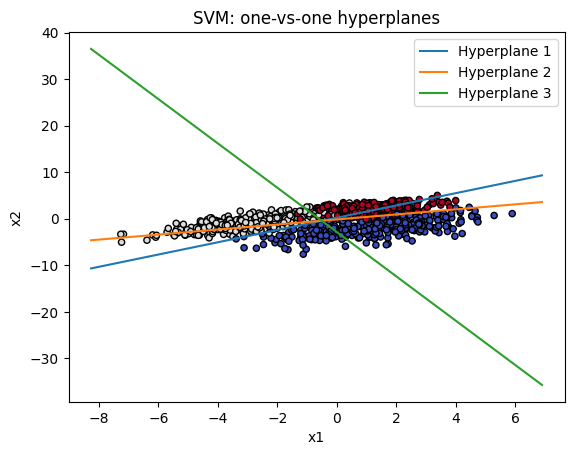

In [51]:
# точки обучающей выборки
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# параметры разделяющих гиперплоскостей
coef = clf.coef_
intercept = clf.intercept_

xx = np.linspace(min(x_train[:, 0])-1, max(x_train[:, 0])+1, 200)

for k in range(len(coef)):
    # уравнение прямой: w0*x + w1*y + b = 0
    # => y = -(w0*x + b) / w1
    w = coef[k]
    b = intercept[k]
    if w[1] != 0:  # чтобы не делить на ноль
        yy = -(w[0] * xx + b) / w[1]
        plt.plot(xx, yy, label=f"Hyperplane {k+1}")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM: one-vs-one hyperplanes")
plt.show()